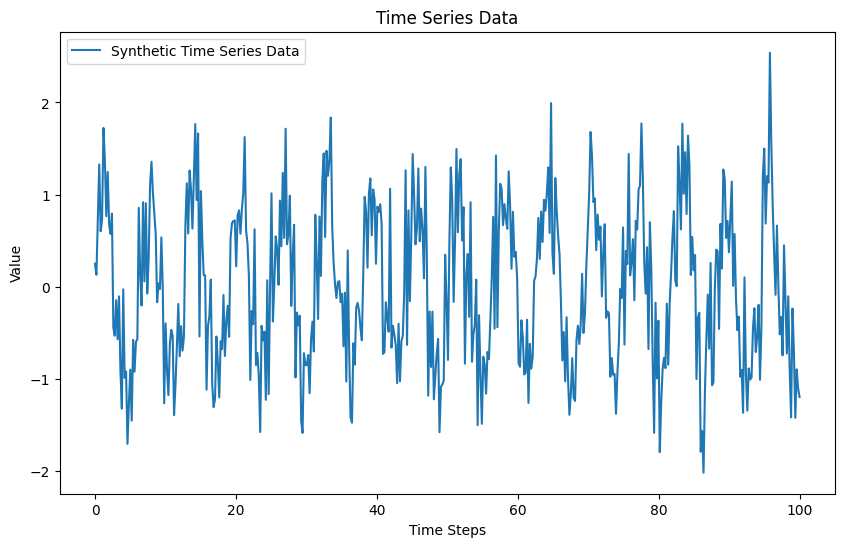

Epoch 1/20


c:\Users\Rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1500 - val_loss: 0.0508
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - val_loss: 0.0447
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0348 - val_loss: 0.0414
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0303 - val_loss: 0.0383
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0315 - val_loss: 0.0356
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0263 - val_loss: 0.0321
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0230 - val_loss: 0.0267
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0188 - val_loss: 0.0173
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0140 - val_loss: 0.0171
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0124 - val_loss: 0.0176
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0128 - val_loss: 0.0209
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0135 - val_l

ValueError: could not broadcast input array from shape (90,) into shape (40,)

In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 2: Generate Synthetic Time Series Data
# This part simulates a sine wave, but you can replace it with your own dataset.
np.random.seed(42)
time_steps = np.linspace(0, 100, 500)
data = np.sin(time_steps) + np.random.normal(scale=0.5, size=len(time_steps))

# Visualize the synthetic time series data
plt.figure(figsize=(10, 6))
plt.plot(time_steps, data, label="Synthetic Time Series Data")
plt.title("Time Series Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 3: Prepare Data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))


# Define a function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)


# Set sequence length and create sequences
sequence_length = 50
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 4: Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Step 5: Train the Model
history = model.fit(
    X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test)
)

# Step 6: Make Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions and targets for interpretability
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# Step 7: Plot Training and Testing Predictions
train_plot = np.empty_like(data)
train_plot[:] = np.nan
train_plot[sequence_length : len(train_predictions) + sequence_length] = (
    train_predictions.reshape(-1)
)

test_plot = np.empty_like(data)
test_plot[:] = np.nan
test_plot[len(train_predictions) + (sequence_length * 2) :] = test_predictions.reshape(
    -1
)

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label="Original Data")
plt.plot(train_plot, label="Training Predictions")
plt.plot(test_plot, label="Testing Predictions")
plt.title("LSTM Model Predictions")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()

# Step 8: Evaluate the Model
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Train Mean Squared Error: {train_mse}")
print(f"Test Mean Squared Error: {test_mse}")